# Lesson Plan

In [2]:
import geopandas as gpd
import folium
import json
import branca

# Point data


Read geospatial data from a shapefile using geopandas built-in function `read_file`

## Geojson files

In [14]:
df = gpd.read_file('/Users/tinnguyen/Desktop/traj.geojson')

In [15]:
df

,geometry
0,"LINESTRING (4.71271 51.83987, 4.71264 51.83974..."


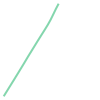

In [16]:
df.geometry[0]

## Shape files

In [36]:
df = gpd.read_file('data/Kruispunten/kruispunten.shp')

Let's take a look at the first few rows of the data frame

In [37]:
df.head()

,OMSCHR,VOORZ_VOP,VOORZ_FOP,VOORZ_VRI,RIJRTNGHRB,RIJRTNGZIJ,AFBUIGING,INVENT_OMS,WVK_ID,WVK_BEGDAT,AFSTAND,FK_VELD1,FK_VELD4,IBN,geometry
0,T-kruispunt met voorrangsregeling,N,N,N,"Alleen rechtdoor, er geldt geen keerverbod op ...",None,None,VBW.c =RW. 7,600126457,2019-02-01,35,060012645720190201,KPK0000877719,I,POINT (131221.686 549197.449)
1,Kruispunt zonder voorrangsregeling,N,N,J,Alle rijrichtingen toegestaan bij een gelijkvl...,None,None,VBW.a en b RW.4 AANSLUITING VLI...,600106352,2020-10-01,9,060010635220201001,KPK0001035645,I,POINT (86877.515 454509.979)
2,T-kruispunt met een linksafvak in de hoofdrijbaan,N,N,J,Alle rijrichtingen toegestaan bij een zijstraat,None,None,OMMERWEG,600149724,2019-02-01,9,060014972420190201,KPK0000877777,I,POINT (216407.551 489182.543)
3,T-kruispunt met fysieke scheiding van de rijbanen,N,N,J,Alle rijrichtingen toegestaan bij een zijstraat,None,None,VBW.c & d =RW. 15,600112636,2019-02-01,4,060011263620190201,KPK0000877782,I,POINT (102849.154 430261.099)
4,Pseudo kruispunt met fysieke scheiding van de ...,N,J,J,Alle rijrichtingen toegestaan bij een gelijkvl...,None,None,NOORDEINDE,600112412,2019-02-01,10,060011241220190201,KPK0000877783,I,POINT (103913.101 429922.414)


To the right most of the printed data, there is the `geometry` column which indicates the geographical information of objects. They are essentially points where there are cross sections on the related road network. Information related to these points are shown in other columns, such as `WVK_ID` - segment id that these points belong to.

Information about the coordinate reference system

In [9]:
df.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

To show the coordinates of the first point

In [8]:
print(df.geometry[0])

POINT (131221.68609934498 549197.4492456331)


Or plot it, we will only get a dot though

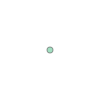

In [10]:
df.geometry[0]

## Create a base map with folium

In [38]:
map = folium.Map(
    location=[51.94, 4.46],
    zoom_start=10
)
# show the map
map

## GeoJson overlay

We can visualise our geospatial data by adding a GeoJson overlay of the map.  
See `folium.features.GeoJson` in [this website](https://python-visualization.github.io/folium/modules.html#folium.features.GeoJsonTooltip) for more information about the function

In [39]:
gjson = folium.features.GeoJson(
    df,
).add_to(map)

map

## Popup

The map just show locations of points.  
To visualise information to the points, we can use `GeoJsonPopup` which popups selected features associating with the points being clicked on.

In [42]:
folium.features.GeoJsonPopup(
    fields=['OMSCHR', 'RIJRTNGHRB'],
    aliases=['OMSCHR', 'RIJRTNGHRB'],
    labels=True
).add_to(gjson)
map

Optional: Marker customisations (colors, ...)